**A Produção Agrícola Municipal - PAM** investiga um conjunto de produtos das lavouras temporárias e permanentes do País que se caracterizam não só pela grande importância econômica que possuem na pauta de exportações, como também por sua relevância social, componentes que são da cesta básica do brasileiro, tendo como unidade de coleta o município.

A periodicidade da pesquisa é anual. Sua abrangência geográfica é nacional, com resultados divulgados para Brasil, Grandes Regiões, Unidades da Federação, Mesorregiões, Microrregiões e Municípios. As informações municipais para cada produto somente são prestadas a partir de um hectare de área ocupada com a cultura e uma tonelada de produção.

Os dados da PAM podem ser úteis para uma variedade de análises e decisões relacionadas ao setor agrícola. Essas análises podem ser essenciais para produtores rurais, governo, instituições financeiras e qualquer outra parte interessada na agricultura.

O objetivo geral da análise dados da PAM é observar as tendências de produção ao longo do tempo, a eficência da produção e a produtividade da lavouras permanentes do estado de Pernambuco até o ano de 2022.

A fonte de dados é o IBGE, disponibilizados pela Base dos Dados https://basedosdados.org/.



In [ ]:
!pip install basedosdados
!pip install -U kaleido


In [11]:
import basedosdados as bd
import kaleido
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px



In [10]:
# query dos dados do datalake da basedosdados no BigQuery
query = """
SELECT *
FROM basedosdados.br_ibge_pam.lavoura_permanente
WHERE sigla_uf = 'PE'
"""

df = bd.read_sql(query, billing_project_id='eda-pam')

Downloading: 100%|██████████| 342608/342608 [00:20<00:00, 16400.01rows/s]


In [12]:
df.head()


,ano,sigla_uf,id_municipio,produto,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,1980,PE,2600054,Guaraná (semente),<NA>,<NA>,NaN,NaN,NaN
1,1980,PE,2600054,Erva-mate (folha verde),<NA>,<NA>,NaN,NaN,NaN
2,1980,PE,2600054,Castanha de caju,<NA>,<NA>,NaN,NaN,NaN
3,1980,PE,2600054,Chá-da-índia (folha verde),<NA>,<NA>,NaN,NaN,NaN
4,1980,PE,2600054,Manga,<NA>,<NA>,NaN,NaN,NaN


In [15]:
df.shape

(342608, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342608 entries, 0 to 342607
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano                        342608 non-null  Int64  
 1   sigla_uf                   342608 non-null  object 
 2   id_municipio               342608 non-null  object 
 3   produto                    342608 non-null  object 
 4   area_destinada_colheita    24476 non-null   Int64  
 5   area_colhida               36558 non-null   Int64  
 6   quantidade_produzida       36558 non-null   float64
 7   rendimento_medio_producao  36535 non-null   float64
 8   valor_producao             36548 non-null   float64
dtypes: Int64(3), float64(3), object(3)
memory usage: 24.5+ MB


In [ ]:
df.isnull().sum()

ano                               0
sigla_uf                          0
id_municipio                      0
produto                           0
area_destinada_colheita      318132
area_colhida                 306050
quantidade_produzida         306050
rendimento_medio_producao    306073
valor_producao               306060
dtype: int64

In [19]:
#cálculo da porcentagem de valores null
df_null = (df.isnull().sum()/df.shape[0]) * 100
df_null


ano                           0.000000
sigla_uf                      0.000000
id_municipio                  0.000000
produto                       0.000000
area_destinada_colheita      92.855975
area_colhida                 89.329496
quantidade_produzida         89.329496
rendimento_medio_producao    89.336209
valor_producao               89.332415
dtype: float64

In [22]:
df['ano'].unique()

<IntegerArray>
[1980, 2021, 2011, 2001, 1984, 1994, 2016, 2006, 1998, 1988, 1974, 2019, 1978,
 1991, 2002, 2000, 1981, 2010, 2020, 1985, 1975, 2009, 1995, 1999, 2005, 1982,
 1986, 1987, 1992, 2008, 2017, 1990, 2015, 2007, 1989, 2022, 2013, 2004, 1983,
 1979, 1977, 2012, 1997, 1996, 2014, 1976, 1993, 2018, 2003]
Length: 49, dtype: Int64

A pesquisa possui dados desde 1974, no entanto, para muitas culturas os dados não estão presentes. Para 'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao' e 'valor_producao', 89% não possuem dados. Para area_destinada a colheita, 93% estão ausentes.

In [24]:
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'produto', 'area_destinada_colheita',
       'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao',
       'valor_producao'],
      dtype='object')

In [ ]:
#df = df.dropna(subset=['area_destinada_colheita', 'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao', 'valor_producao'])

In [25]:
df.describe()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
count,342608.0,24476.0,36558.0,36558.000000,36535.000000,3.654800e+04
mean,1998.0,130.355369,162.747716,1364.844117,13030.916465,8.613731e+02
std,14.142156,545.694524,784.786828,8800.470101,16792.906560,1.593102e+04
min,1974.0,1.0,0.0,0.000000,5.000000,0.000000e+00
25%,1986.0,5.0,5.0,26.000000,3000.000000,0.000000e+00
50%,1998.0,12.0,14.0,98.000000,8000.000000,2.000000e+00
75%,2010.0,50.0,50.0,420.000000,15500.000000,3.100000e+01
max,2022.0,16800.0,21177.0,369000.000000,248000.000000,1.189595e+06


In [29]:
quant_produtos = df['produto'].nunique()
print(f'{quant_produtos} produtos agrícolas')

38 produtos agrícolas


In [36]:
# lista os produtos pesquisados
lista_produtos = df['produto'].unique()
print(f'Lista de produtos: {lista_produtos}')

Lista de produtos: ['Guaraná (semente)' 'Erva-mate (folha verde)' 'Castanha de caju'
 'Chá-da-índia (folha verde)' 'Manga' 'Borracha (látex líquido)' 'Limão'
 'Maçã' 'Caqui' 'Sisal ou agave (fibra)' 'Noz (fruto seco)' 'Laranja'
 'Caju' 'Pimenta-do-reino' 'Cacau (em amêndoa)' 'Abacate' 'Azeitona' 'Uva'
 'Tangerina' 'Urucum (semente)' 'Maracujá' 'Figo'
 'Algodão arbóreo (em caroço)' 'Banana (cacho)' 'Café (em grão) Total'
 'Pêssego' 'Marmelo' 'Café (em grão) Arábica' 'Goiaba'
 'Tungue (fruto seco)' 'Borracha (látex coagulado)' 'Açaí' 'Coco-da-baía*'
 'Palmito' 'Café (em grão) Canephora' 'Dendê (cacho de coco)' 'Mamão'
 'Pera']


In [ ]:
#df['produto'] = df['produto'].astype(str)
#df['produto'] = df['produto'].str.replace('Coco-da-baía*', 'Coco-da-baía')


In [39]:
quant_produzida = df.groupby('ano')['quantidade_produzida'].sum().reset_index()
quant_produzida

,ano,quantidade_produzida
0,1974,1248358.45
1,1975,1213203.15
2,1976,1330346.53
3,1977,1279555.45
4,1978,1042826.63
5,1979,1041001.77
6,1980,1001785.23
7,1981,848010.01
8,1982,802479.73
9,1983,701450.79


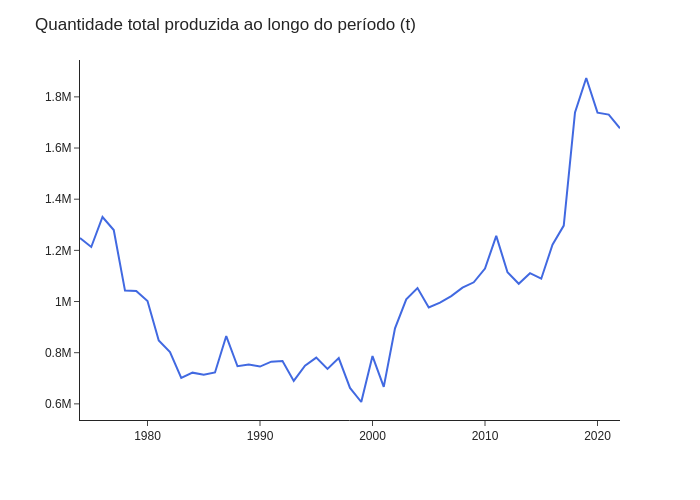

In [47]:
fig_quant_produzida = px.line(
    quant_produzida,
    x='ano',
    y='quantidade_produzida',
    color_discrete_sequence=['RoyalBlue']
)
fig_quant_produzida.update_layout(
    title='Quantidade total produzida ao longo do período (t)',
    xaxis_title='',
    yaxis_title='',
    template='simple_white'
)
fig_quant_produzida.show('png')


In [45]:
# filtra a quantidade produzida no período de 2012 a 2022
quantidade_produzida_periodo = quant_produzida[(quant_produzida['ano'] >= 2012) & (quant_produzida['ano'] <= 2022)]

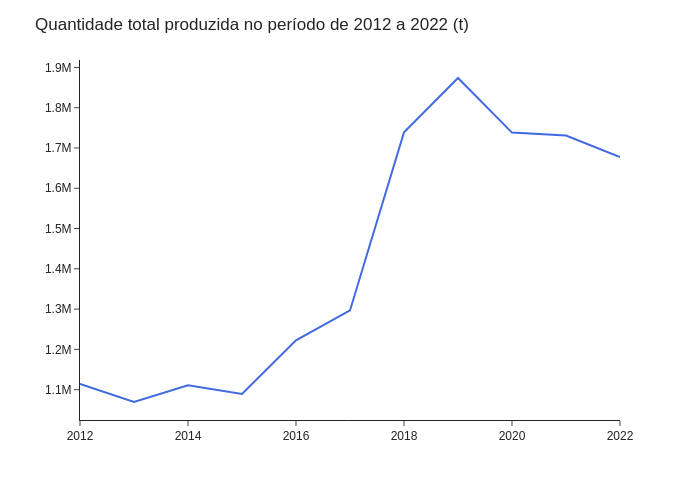

In [46]:
fig = px.line(
    quantidade_produzida_periodo,
    x='ano',
    y='quantidade_produzida',
    color_discrete_sequence=['RoyalBlue']
)
fig.update_layout(
    title='Quantidade total produzida no período de 2012 a 2022 (t)',
    xaxis_title='',
    yaxis_title='',
    template='simple_white'
)
fig.show('png')

In [48]:
# agrupa os 10 produtos com maior quantidade produzida
top10_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head(10).reset_index()
top10_produtos


,produto,quantidade_produzida
0,Banana (cacho),18941279.40
1,Manga,6746762.43
2,Uva,5947454.00
3,Laranja,5185026.00
4,Coco-da-baía*,3984176.00
5,Goiaba,3696930.60
6,Caju,3317744.00
7,Maracujá,352756.35
8,Algodão arbóreo (em caroço),342216.00
9,Mamão,278482.00


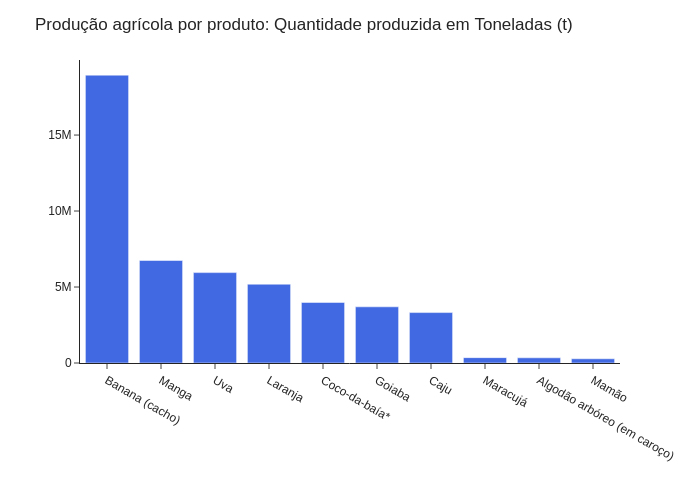

In [52]:
fig_top10_produtos = px.bar(
    top10_produtos,
    x='produto',
    y='quantidade_produzida',
    color_discrete_sequence=['RoyalBlue']
)
fig_top10_produtos.update_layout(
    title='Produção agrícola por produto: Quantidade produzida em toneladas (t)',
    xaxis_title='',
    yaxis_title='',
    template='simple_white'
)
fig_top10_produtos.show('png')

In [57]:
# agrupa os 5 produtos com maior quantidade_produzida
top5_produtos = (
    df
    .groupby('produto')['quantidade_produzida'].sum()
    .sort_values(ascending=False)
    .head()
    .reset_index()
)
top5_produtos

,produto,quantidade_produzida
0,Banana (cacho),18941279.40
1,Manga,6746762.43
2,Uva,5947454.00
3,Laranja,5185026.00
4,Coco-da-baía*,3984176.00


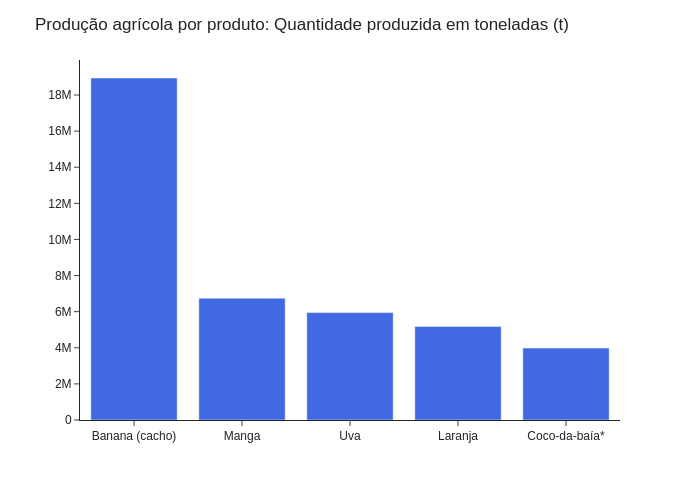

In [77]:
fig_top5_produtos = px.bar(
    top5_produtos,
    x='produto',
    y='quantidade_produzida',
    color_discrete_sequence=['RoyalBlue']
)
fig_top5_produtos.update_layout(
    title='Produção agrícola por produto: Quantidade produzida em toneladas (t)',
    xaxis_title='',
    yaxis_title='',
    template='simple_white'
)
fig_top5_produtos.show('png')



In [64]:
# agrupa os 5 principais produtos por ano
top5_produtos_por_ano = (
    df[df['produto']
    .isin(top5_produtos['produto'])]
    .groupby(['produto', 'ano'])['quantidade_produzida'].sum()
    .reset_index()
)
top5_produtos_por_ano

,produto,ano,quantidade_produzida
0,Banana (cacho),1974,224400.0
1,Banana (cacho),1975,235181.4
2,Banana (cacho),1976,350064.0
3,Banana (cacho),1977,350176.2
4,Banana (cacho),1978,322024.2
...,...,...,...
240,Uva,2018,426392.0
241,Uva,2019,456080.0
242,Uva,2020,349757.0
243,Uva,2021,420501.0


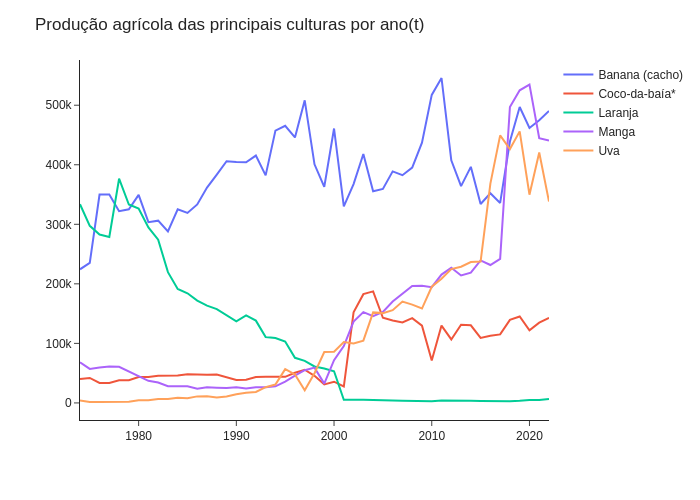

In [69]:
fig_top5_produtos_por_ano = px.line(
    top5_produtos_por_ano,
    x='ano',
    y='quantidade_produzida',
    color='produto'
)
fig_top5_produtos_por_ano.update_layout(
    title='Produção agrícola das principais culturas por ano(t)',
    xaxis_title='',
    yaxis_title='',
    legend_title_text='',
    template='simple_white')
fig_top5_produtos_por_ano.show('png')


In [74]:
# filtra os 5 principais produtos no periodo de 2012 a 2022
top5_produtos_por_periodo = (
    top5_produtos_por_ano
    [(top5_produtos_por_ano['ano'] >= 2012) &
    (top5_produtos_por_ano['ano'] <= 2022)]
)
top5_produtos_por_periodo.head()

,produto,ano,quantidade_produzida
38,Banana (cacho),2012,407574.0
39,Banana (cacho),2013,364144.0
40,Banana (cacho),2014,396470.0
41,Banana (cacho),2015,334125.0
42,Banana (cacho),2016,352067.0


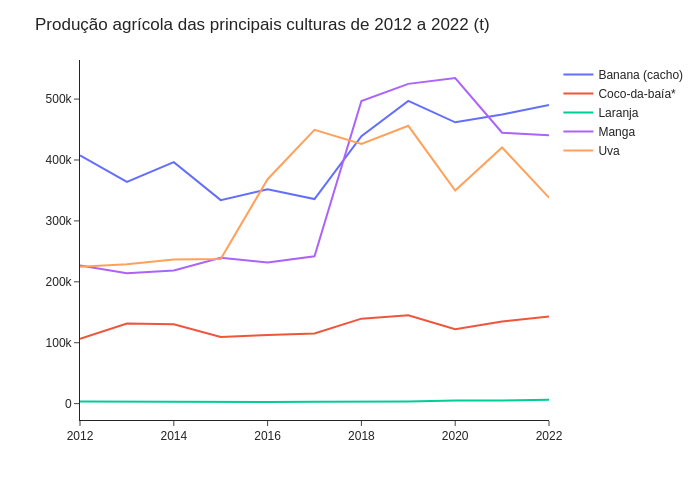

In [76]:
fig_top5_produtos_por_periodo = px.line(
    top5_produtos_por_periodo,
    x='ano',
    y='quantidade_produzida',
    color='produto'
)
fig_top5_produtos_por_periodo.update_layout(
    title='Produção agrícola das principais culturas de 2012 a 2022 (t)',
    xaxis_title='',
    yaxis_title='',
    legend_title_text='',
    template='simple_white'
)
fig_top5_produtos_por_periodo.show('png')


In [78]:
df.corr()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
ano,1.000000,0.025309,-0.049351,0.053634,-0.228107,0.076161
area_destinada_colheita,0.025309,1.000000,0.985385,0.688498,0.021161,0.425263
area_colhida,-0.049351,0.985385,1.000000,0.391207,-0.057379,0.234628
quantidade_produzida,0.053634,0.688498,0.391207,1.000000,0.149483,0.759881
rendimento_medio_producao,-0.228107,0.021161,-0.057379,0.149483,1.000000,0.059354
valor_producao,0.076161,0.425263,0.234628,0.759881,0.059354,1.000000


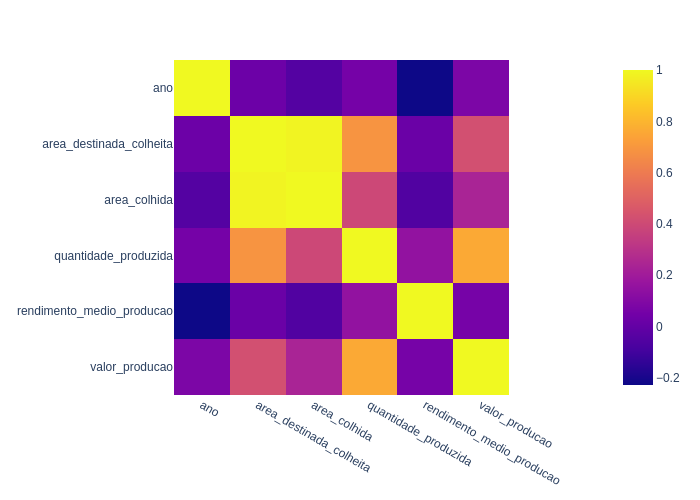

In [79]:
fig_corr = px.imshow(df.corr())
fig_corr.show('png')

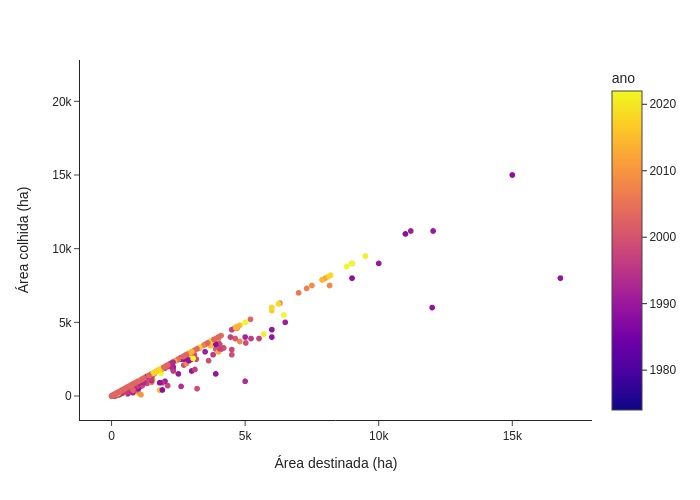

In [88]:
fig_corr_areas = px.scatter(
    df,
    x='area_destinada_colheita',
    y="area_colhida",
    color='ano'
)
fig_corr_areas.update_layout(
    title='',
    xaxis_title='Área destinada (ha)',
    yaxis_title='Área colhida (ha)',
    legend_title_text='',
    template='simple_white'
)
fig_corr_areas.show('png')

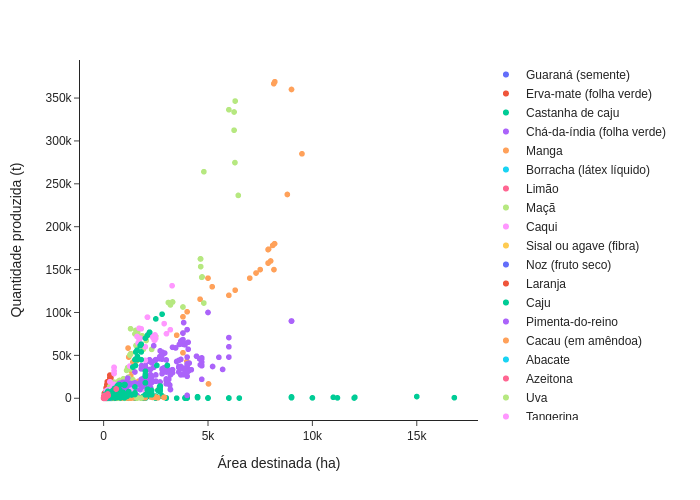

In [89]:
fig_corr_quant_area = px.scatter(
    df,
    x='area_destinada_colheita',
    y="quantidade_produzida",
    color='produto')
fig_corr_quant_area.update_layout(
    title='',
    xaxis_title='Área destinada (ha)',
    yaxis_title='Quantidade produzida (t)',
    legend_title_text='',
    template='simple_white'
)
fig_corr_quant_area.show('png')

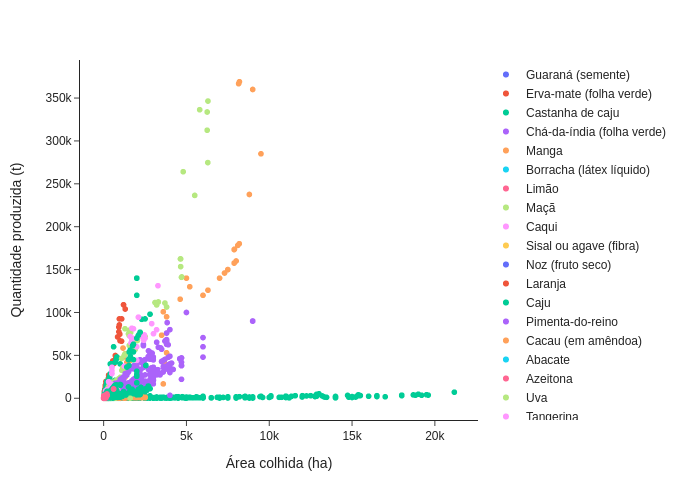

In [90]:
fig_corr_quant_area_colhida = px.scatter(
    df,
    x='area_colhida',
    y="quantidade_produzida",
    color='produto')
fig_corr_quant_area_colhida.update_layout(
    title='',
    xaxis_title='Área colhida (ha)',
    yaxis_title='Quantidade produzida (t)',
    legend_title_text='',
    template='simple_white'
)
fig_corr_quant_area_colhida.show('png')

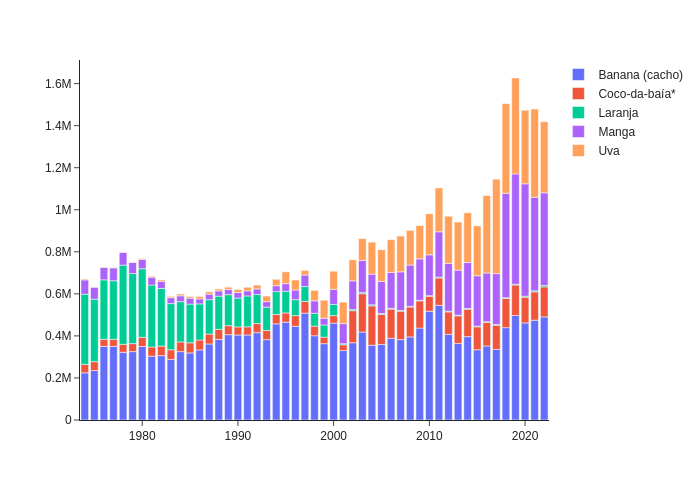

In [94]:
fig = px.bar(
    top5_produtos_por_ano,
    x='ano',
    y='quantidade_produzida',
    color='produto'
)
fig.update_layout(
    title='',
    xaxis_title='',
    yaxis_title='',
    legend_title_text='',
    template='simple_white'
)
fig.show('png')



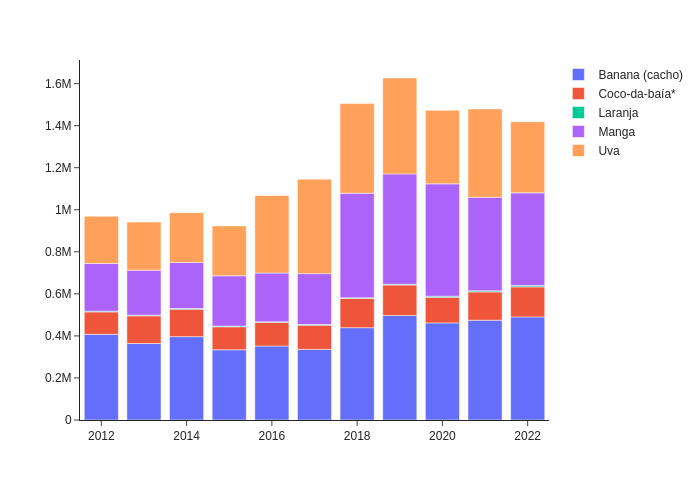

In [95]:
fig = px.bar(
    top5_produtos_por_periodo,
    x='ano',
    y='quantidade_produzida',
    color='produto'
)
fig.update_layout(
    title='',
    xaxis_title='',
    yaxis_title='',
    legend_title_text='',
    template='simple_white'
)
fig.show('png')

In [103]:
top10_produtos_por_ano = df[df['produto'].isin(top10_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()

top10_produtos_por_periodo = top10_produtos_por_ano[(top10_produtos_por_ano['ano'] >= 2012) & (top10_produtos_por_ano['ano'] <= 2022)]

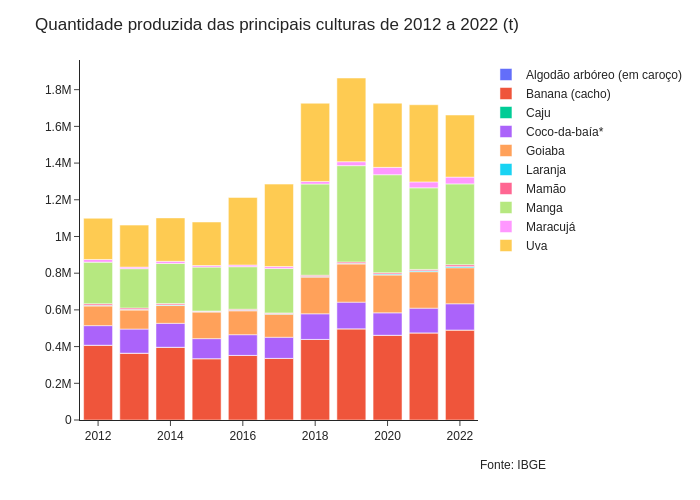

In [104]:
fig = px.bar(
    top10_produtos_por_periodo,
    x='ano',
    y='quantidade_produzida',
    color='produto'
)
fig.update_layout(
    title='Quantidade produzida das principais culturas de 2012 a 2022 (t)',
    xaxis_title='',
    yaxis_title='',
    legend_title_text='',
    template='simple_white'
)
# Adiciona a fonte dos dados no rodapé do gráfico
fig.update_layout(
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1,     # 1 alinha ao final do eixo x. 0 alinha ao início do eixo x
            y=-0.1,  # Ajuste da coordenada y para posicionar o rodapé abaixo do gráfico
            xanchor='left',
            yanchor='top',
            text='Fonte: IBGE',
            font=dict(size=12),
            showarrow=False
        )
    ]
)
fig.show('png')


In [105]:
area_por_ano = (
    df[df['ano'] > 1987]
    .groupby('ano')[['area_destinada_colheita', 'area_colhida']].sum()
    .reset_index()
)
area_por_ano


,ano,area_destinada_colheita,area_colhida
0,1988,135298,129176
1,1989,135089,105539
2,1990,117799,111146
3,1991,106318,102338
4,1992,102394,98816
5,1993,87935,81016
6,1994,81024,76590
7,1995,79981,78732
8,1996,86429,79556
9,1997,93111,83853


In [107]:
percentual_area_colhida = (area_por_ano['area_colhida']/area_por_ano['area_destinada_colheita']) * 100
percentual_area_colhida

0     95.475173
1     78.125532
2     94.352244
3     96.256513
4     96.505655
5     92.131688
6     94.527547
7     98.438379
8     92.047808
9     90.057029
10    85.733726
11    80.391541
12    99.275362
13    94.425594
14     97.58422
15    99.290512
16     99.45705
17    99.590446
18    99.808088
19    99.830642
20    93.314221
21    99.918692
22    96.276328
23        100.0
24    98.209317
25     98.35713
26    99.371523
27    99.051097
28    94.411413
29    98.980498
30    99.236507
31    96.952479
32      97.1639
33    97.078684
34    97.511268
dtype: Float64

In [110]:
area_por_ano['percentual_area_colhida'] = percentual_area_colhida
area_por_ano


,ano,area_destinada_colheita,area_colhida,percentual_area_colhida
0,1988,135298,129176,95.475173
1,1989,135089,105539,78.125532
2,1990,117799,111146,94.352244
3,1991,106318,102338,96.256513
4,1992,102394,98816,96.505655
5,1993,87935,81016,92.131688
6,1994,81024,76590,94.527547
7,1995,79981,78732,98.438379
8,1996,86429,79556,92.047808
9,1997,93111,83853,90.057029


In [112]:
area_por_ano.sort_values('percentual_area_colhida', ascending=True)


,ano,area_destinada_colheita,area_colhida,percentual_area_colhida
1,1989,135089,105539,78.125532
11,1999,89186,71698,80.391541
10,1998,88180,75600,85.733726
9,1997,93111,83853,90.057029
8,1996,86429,79556,92.047808
5,1993,87935,81016,92.131688
20,2008,100108,93415,93.314221
2,1990,117799,111146,94.352244
28,2016,76191,71933,94.411413
13,2001,78394,74024,94.425594


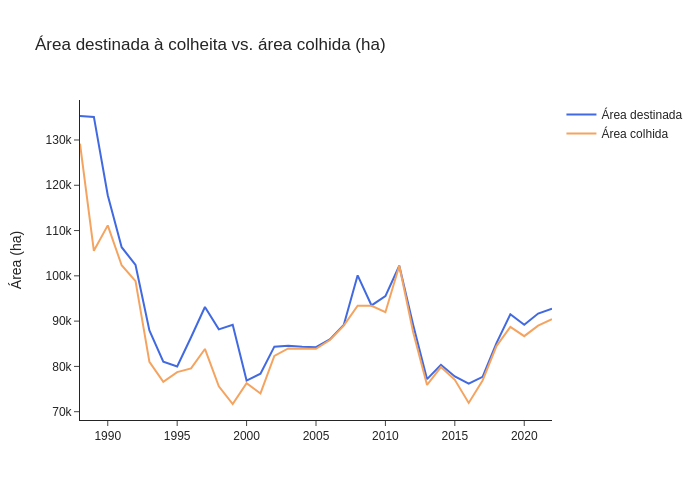

In [116]:
fig_areas = px.line(
    area_por_ano,
    x='ano',
    y=['area_destinada_colheita', 'area_colhida'],
    title='Área destinada à colheita vs. área colhida (ha)',
    color_discrete_sequence=['RoyalBlue','SandyBrown']
)
# Mapea os novos nomes das séries na legenda
nomes_novos = {'area_destinada_colheita': 'Área destinada',
              'area_colhida': 'Área colhida'}
# Atualiza o nome de cada série na figura
for trace in fig_areas.data:
    trace.name = nomes_novos[trace.name]

fig_areas.update_layout(
    xaxis_title='',
    yaxis_title='Área (ha)',
    legend_title_text='',
    template='simple_white'
)
fig_areas.show('png')



In [121]:
rendimento_medio_por_ano = (
    df.groupby('ano')['rendimento_medio_producao']
    .mean()
    .reset_index()
)
rendimento_medio_por_ano.head()

,ano,rendimento_medio_producao
0,1974,22093.547183
1,1975,19304.214201
2,1976,19312.986750
3,1977,18560.691255
4,1978,18754.129885


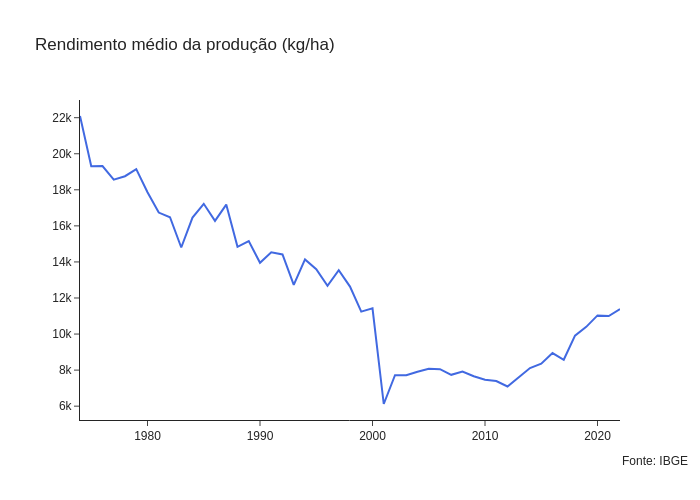

In [120]:
fig = px.line(rendimento_medio_por_ano, x='ano', y='rendimento_medio_producao',
              title='Rendimento médio da produção (kg/ha)',
              color_discrete_sequence=['RoyalBlue'])
fig.update_layout(xaxis_title='',
                  yaxis_title='',
                  template='simple_white')
fig.update_layout(
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1,
            xanchor='left',
            yanchor='top',
            text='Fonte: IBGE',
            font=dict(size=12),
            showarrow=False
        )
    ]
)
fig.show('png')

In [126]:
df_produtividade = (
    df.groupby
    (['produto', 'ano'])['quantidade_produzida', 'area_colhida'].sum()
    .reset_index()
)
df_produtividade['produtividade_media'] = (
    (df_produtividade
    ['quantidade_produzida']/df_produtividade['area_colhida'])
)
df_produtividade


,produto,ano,quantidade_produzida,area_colhida,produtividade_media
0,Abacate,1974,14806.32,1456,10.169176
1,Abacate,1975,15246.36,1471,10.364623
2,Abacate,1976,14494.72,1474,9.833596
3,Abacate,1977,12523.28,1184,10.577095
4,Abacate,1978,10698.14,1097,9.752179
...,...,...,...,...,...
1857,Uva,2018,426392.00,8745,48.758376
1858,Uva,2019,456080.00,8806,51.79196
1859,Uva,2020,349757.00,8298,42.149554
1860,Uva,2021,420501.00,8838,47.578751


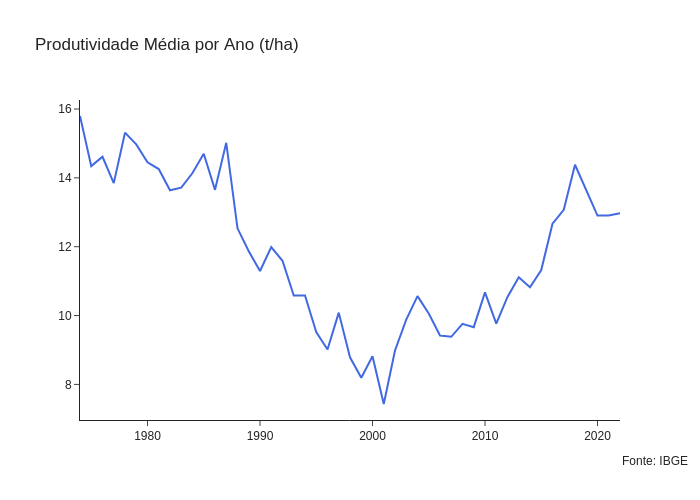

In [127]:
produtividade_media_por_ano = (
    df_produtividade.groupby('ano')
    ['produtividade_media']
    .mean()
    .reset_index()
)
fig = px.line(
    produtividade_media_por_ano,
    x='ano',
    y='produtividade_media',
    title='Produtividade Média por Ano (t/ha)',
    color_discrete_sequence=['RoyalBlue']
)

fig.update_layout(xaxis_title='',
                  yaxis_title='',
                  template='simple_white'
)
# Adiciona a fonte dos dados no rodapé do gráfico
fig.update_layout(
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1,
            xanchor='left',
            yanchor='top',
            text='Fonte: IBGE',
            font=dict(size=12),
            showarrow=False
        )
    ]
)
fig.show('png')


In [128]:
df_valor_producao = (
    df.groupby(['produto', 'ano'])
    ['valor_producao', 'quantidade_produzida'].sum()
    .reset_index()
)


In [129]:
df_valor_producao.sort_values('valor_producao', ascending=False).head(20)

,produto,ano,valor_producao,quantidade_produzida
1861,Uva,2022,1712957.0,338206.0
1860,Uva,2021,1549239.0,420501.0
1859,Uva,2020,1252711.0,349757.0
1858,Uva,2019,1250585.0,456080.0
1857,Uva,2018,999254.0,426392.0
1856,Uva,2017,927162.0,449383.0
1855,Uva,2016,746579.0,368441.0
1852,Uva,2013,658460.0,228727.0
244,Banana (cacho),2022,633171.0,490440.0
1853,Uva,2014,590557.0,236719.0


In [134]:
rendimento_medio_por_produto = (
    df.groupby(['produto', 'ano'])
    ['rendimento_medio_producao']
    .mean()
    .reset_index()
)
rendimento_medio_por_produto = (
    rendimento_medio_por_produto
    .sort_values('rendimento_medio_producao', ascending=False)
)

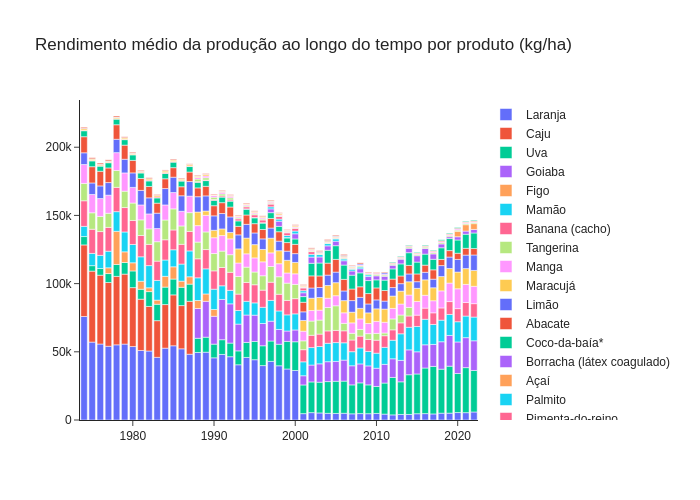

In [139]:
fig = px.bar(
    rendimento_medio_por_produto,
    x='ano',
    y='rendimento_medio_producao',
    color='produto',
    title='Rendimento médio da produção ao longo do tempo por produto (kg/ha)'
)
fig.update_layout(xaxis_title='',
                  yaxis_title='',
                  legend_title_text='',
                  template='simple_white'
)
fig.show('png')